In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
!pip install nltk
!pip install nltk matplotlib

# Read the first Excel file into a pandas DataFrame
file1 = "animation_simple_wikipedia_articles.xlsx"
df1 = pd.read_excel(file1)
df1['label'] = 0

# Read the second Excel file into a pandas DataFrame
file2 = "animation_full_wikipedia_articles.xlsx"
df2 = pd.read_excel(file2)
df2['label'] = 1

# Read the first Excel file into a pandas DataFrame
file3 = "art_simple_wikipedia_articles.xlsx"
df3 = pd.read_excel(file3)
df3['label'] = 0

# Read the second Excel file into a pandas DataFrame
file4 = "art_full_wikipedia_articles.xlsx"
df4 = pd.read_excel(file4)
df4['label'] = 1

# Read the first Excel file into a pandas DataFrame
file5 = "engineering_simple_wikipedia_articles.xlsx"
df5 = pd.read_excel(file5)
df5['label'] = 0

# Read the second Excel file into a pandas DataFrame
file6 = "engineering_full_wikipedia_articles.xlsx"
df6 = pd.read_excel(file6)
df6['label'] = 1

# Read the first Excel file into a pandas DataFrame
file7 = "weather_simple_wikipedia_articles.xlsx"
df7 = pd.read_excel(file7)
df7['label'] = 0

# Read the second Excel file into a pandas DataFrame
file8 = "weather_full_wikipedia_articles.xlsx"
df8 = pd.read_excel(file8)
df8['label'] = 1

# Read the first Excel file into a pandas DataFrame
file9 = "medicine_simple_wikipedia_articles.xlsx"
df9 = pd.read_excel(file9)
df9['label'] = 0

# Read the second Excel file into a pandas DataFrame
file10 = "medicine_full_wikipedia_articles.xlsx"
df10 = pd.read_excel(file10)
df10['label'] = 1

# Read the first Excel file into a pandas DataFrame
file11 = "wood_simple_wikipedia_articles.xlsx"
df11 = pd.read_excel(file11)
df11['label'] = 0

# Read the second Excel file into a pandas DataFrame
file12 = "wood_full_wikipedia_articles.xlsx"
df12 = pd.read_excel(file12)
df12['label'] = 1

# Read the first Excel file into a pandas DataFrame
file13 = "tourism_simple_wikipedia_articles.xlsx"
df13 = pd.read_excel(file13)
df13['label'] = 0

# Read the second Excel file into a pandas DataFrame
file14 = "tourism_full_wikipedia_articles.xlsx"
df14 = pd.read_excel(file14)
df14['label'] = 1

# Read the first Excel file into a pandas DataFrame
file15 = "fire_simple_wikipedia_articles.xlsx"
df15 = pd.read_excel(file15)
df15['label'] = 0

# Read the second Excel file into a pandas DataFrame
file16 = "fire_full_wikipedia_articles.xlsx"
df16 = pd.read_excel(file16)
df16['label'] = 1

# Read the first Excel file into a pandas DataFrame
file17 = "money_simple_wikipedia_articles.xlsx"
df17 = pd.read_excel(file17)
df17['label'] = 0

# Read the second Excel file into a pandas DataFrame
file18 = "money_full_wikipedia_articles.xlsx"
df18 = pd.read_excel(file18)
df18['label'] = 1

# Read the first Excel file into a pandas DataFrame
file19 = "sculpture_simple_wikipedia_articles.xlsx"
df19 = pd.read_excel(file19)
df19['label'] = 0

# Read the second Excel file into a pandas DataFrame
file20 = "sculpture_full_wikipedia_articles.xlsx"
df20 = pd.read_excel(file20)
df20['label'] = 1

# Read the first Excel file into a pandas DataFrame
file21 = "astronomy_simple_wikipedia_articles.xlsx"
df21 = pd.read_excel(file21)
df21['label'] = 0

# Read the second Excel file into a pandas DataFrame
file22 = "astronomy_full_wikipedia_articles.xlsx"
df22 = pd.read_excel(file22)
df22['label'] = 1

# Read the first Excel file into a pandas DataFrame
file23 = "theology_simple_wikipedia_articles.xlsx"
df23 = pd.read_excel(file23)
df23['label'] = 0

# Read the second Excel file into a pandas DataFrame
file24 = "theology_full_wikipedia_articles.xlsx"
df24 = pd.read_excel(file24)
df24['label'] = 1

# Read the first Excel file into a pandas DataFrame
file25 = "software_simple_wikipedia_articles.xlsx"
df25 = pd.read_excel(file25)
df25['label'] = 0

# Read the second Excel file into a pandas DataFrame
file26 = "software_full_wikipedia_articles.xlsx"
df26 = pd.read_excel(file26)
df26['label'] = 1



# Merge or concatenate the DataFrames
# For example, if you want to concatenate them row-wise:
merged_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26], ignore_index=True)

# Define column names
column_names = ['category', 'text','label']  # Add column names as needed

# Assign column names directly to the merged DataFrame
merged_df.columns = column_names
df1.columns = column_names
df2.columns = column_names
df3.columns = column_names
df4.columns = column_names

# Print the merged DataFrame to verify the header
print(len(merged_df.columns))



3


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Slope for Label 0: -1.1586078614864335


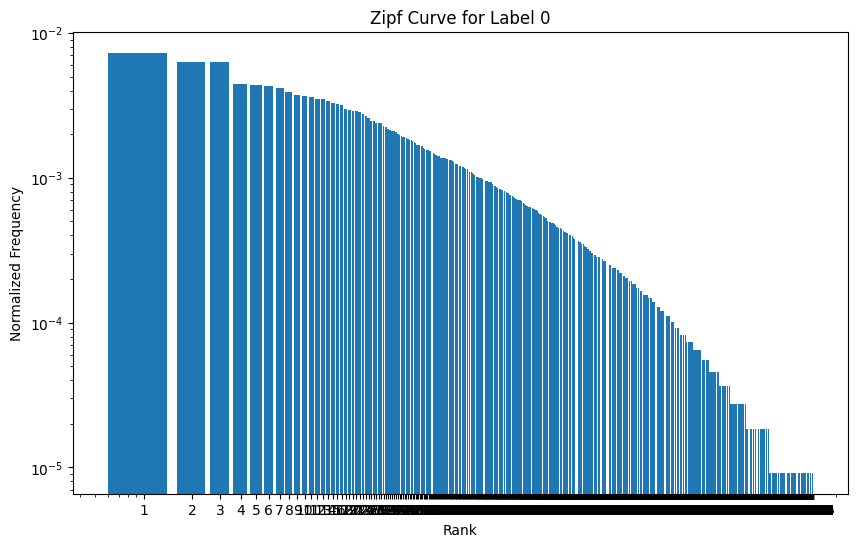

Slope for Label 1: -1.2952356626628871


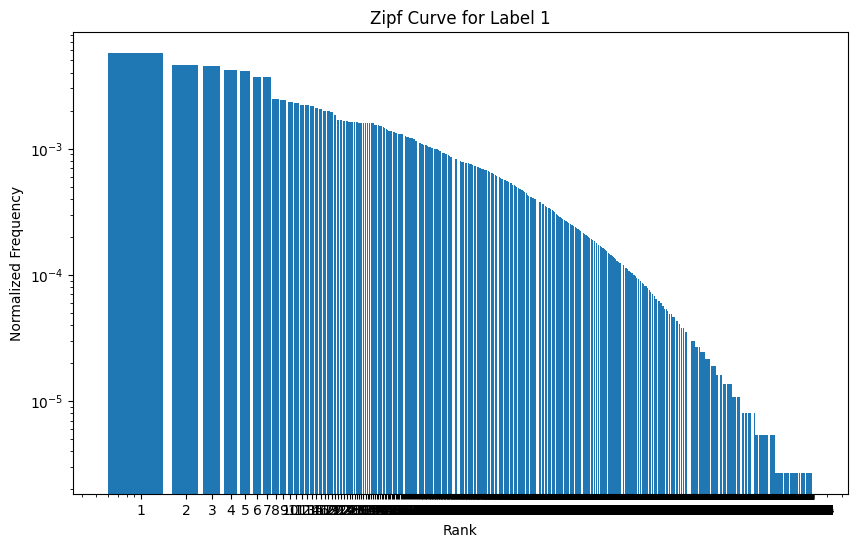

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from scipy.stats import linregress

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to lemmatize and remove stop words, with NaN handling
def preprocess_text(text):
    if pd.isna(text):  # Check for NaN values
        return ''
    words = nltk.word_tokenize(text.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)

for label in merged_df['label'].unique():
    # Get texts for the current label
    texts = merged_df[merged_df['label'] == label]['text']
    # Preprocess texts and flatten the list of tokens
    all_tokens = []
    for text in texts:
        all_tokens.extend(preprocess_text(text).split())  # Split to get tokens

    # Count word frequencies
    word_freq = Counter(all_tokens)

    # Sort words by frequency
    sorted_freq = sorted(word_freq.values(), reverse=True)

    # Normalize frequencies
    total_words = sum(sorted_freq)
    normalized_freq = [freq / total_words for freq in sorted_freq]

    # Create ranks
    ranks = np.arange(1, len(normalized_freq) + 1)

    # Calculate slope using linear regression on log-transformed data
    log_ranks = np.log(ranks)
    log_freqs = np.log(normalized_freq)

    slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_freqs)

    # Print the slope
    print(f'Slope for Label {label}: {slope}')

    # Plot Zipf's curve using vertical bars
    plt.figure(figsize=(10, 6))
    plt.bar(ranks, normalized_freq)
    plt.title(f'Zipf Curve for Label {label}')
    plt.xlabel('Rank')
    plt.ylabel('Normalized Frequency')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(ticks=ranks, labels=ranks)
    #plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


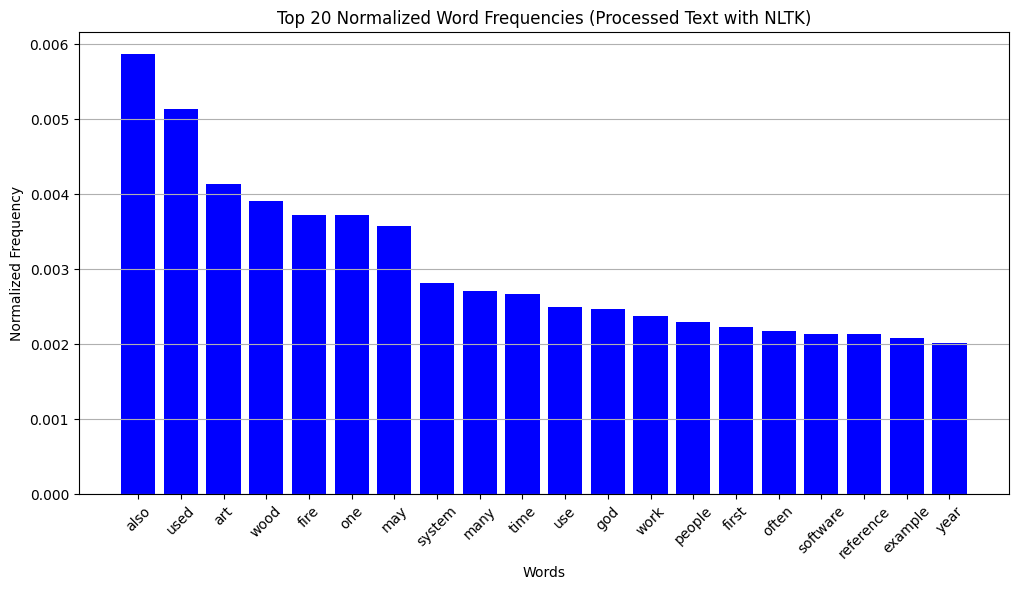

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to lemmatize and remove stop words, with NaN handling
def preprocess_text(text):
    if pd.isna(text):  # Check for NaN values
        return ''
    words = nltk.word_tokenize(text.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)

# Apply preprocessing to the text
merged_df['processed_text'] = merged_df['text'].apply(preprocess_text)

# Combine all processed text data
all_text = ' '.join(merged_df['processed_text'])

# Count word frequencies
word_counts = Counter(all_text.split())

# Create a DataFrame from the word counts
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

# Sort by frequency
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

# Calculate total words and normalize frequency
total_words = word_freq_df['frequency'].sum()
word_freq_df['normalized_frequency'] = word_freq_df['frequency'] / total_words

# Add rank
word_freq_df['rank'] = np.arange(1, len(word_freq_df) + 1)

# Plotting normalized word frequencies as vertical bars for the top 20 words
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['word'][:20], word_freq_df['normalized_frequency'][:20], color='blue')
plt.xticks(rotation=45)
plt.title("Top 20 Normalized Word Frequencies (Processed Text with NLTK)")
plt.xlabel('Words')
plt.ylabel('Normalized Frequency')
plt.grid(axis='y')
plt.show()


In [ ]:
word_freq_df

,word,frequency,normalized_frequency,rank
0,also,2809,0.005866,1
1,used,2458,0.005133,2
2,art,1976,0.004126,3
3,wood,1870,0.003905,4
4,fire,1780,0.003717,5
...,...,...,...,...
36354,nanofabrication,1,0.000002,36355
36355,fabricating,1,0.000002,36356
36356,industrialised,1,0.000002,36357
36357,solder,1,0.000002,36358


Rank based classification


In [ ]:
# Function to find ranks for each preprocessed text
def get_word_ranks(text, words_df):
    # Tokenize the preprocessed text
    tokens = text.split()  # You might want to use more advanced tokenization depending on your needs
    # Get ranks for each token
    ranks = [words_df.loc[words_df['word'] == token, 'rank'].values[0] for token in tokens if token in words_df['word'].values]
    return ranks

# Function to count ranks higher than k
def count_higher_than_k(ranks, k):
    return sum(rank > k for rank in ranks)

def count_lower_than_k(ranks, k):
    return sum(rank <= k for rank in ranks)

k = 800

In [ ]:
merged_df['ranks'] = merged_df['processed_text'].apply(lambda x: get_word_ranks(x, word_freq_df))


In [ ]:
# Apply the function to count ranks higher than k
merged_df['count_higher_than_k'] = merged_df['ranks'].apply(lambda x: count_higher_than_k(x, k))
merged_df['count_lower_than_k'] = merged_df['ranks'].apply(lambda x: count_lower_than_k(x, k))


In [ ]:
count = 0

expert = 0
expert_pred = 0
for index, row in merged_df.iterrows():
    if row['label'] == 1 :
      expert+=1
      if row['count_higher_than_k'] >= row['count_lower_than_k']:
        expert_pred+=1
        count += 1


beginner = 0
beginner_pred = 0
# Display the result
for index, row in merged_df.iterrows():
    if row['label'] == 0 :
      beginner+=1
      if row['count_higher_than_k'] <= row['count_lower_than_k']:
        beginner_pred+=1
        count += 1

print("count :")
print(count/(beginner+expert))

print("\n")
#print(beginner)
print("beginner predictions : ")
print(beginner_pred/beginner)
print("\n")
print("expert predictions :")
print(expert_pred/expert)

count :
0.6174496644295302


beginner predictions : 
0.5811138014527845


expert predictions :
0.6757281553398058


Cumulative distribution of beginner texts vs expert texts

In [2]:
train_df, val_df, test_df = np.split(merged_df.sample(frac=1, random_state=42),
                                     [int(.8*len(merged_df)), int(.9*len(merged_df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [3]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  # Correct import for stopwords
from nltk.stem import PorterStemmer  # Importing the stemmer from nltk

# Example DataFrame
df = train_df

# Step 1: Preprocess text (convert to lowercase, remove punctuation, stop words, and apply stemming)
# Replace NaN values with empty strings
df['text'] = df['text'].fillna('')

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to clean text: convert to lowercase, remove punctuation, remove stop words, and apply stemming
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Apply stemming to each word
    words = [stemmer.stem(word) for word in words]

    # Return cleaned and stemmed text
    return ' '.join(words)

# Apply the preprocessing function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Step 2: Tokenize and count word frequencies in the corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Get word frequencies in the entire corpus
word_freq = np.array(X.sum(axis=0)).flatten()
#word_ranks = np.argsort(word_freq)[::-1]  # Sort words based on frequency (descending order)
word_rank_dict = {word: rank for rank, word in enumerate(vectorizer.get_feature_names_out())}

# Step 3: Calculate the Cumulative Probability Mass (CDF) for each text
def calculate_cdf(text, s=1.5):
    words = text.split()
    ranks = [word_rank_dict[word] for word in words if word in word_rank_dict]
    ranks = np.array(ranks) + 1  # Convert ranks to 1-based (e.g., most common word is rank 1)

    # Calculate the cumulative probability mass
    cdf = np.sum(1 / (ranks ** s)) / np.sum(1 / (np.arange(1, len(word_freq) + 1) ** s))

    return cdf

# Apply CDF calculation to each text
df['cdf'] = df['text'].apply(calculate_cdf)

# Step 4: Set a threshold for classification
threshold = np.median(df['cdf'])  # Use the median CDF as a threshold (or adjust as needed)

print(f"Threshold for Classification: {threshold}")
'''
# Step 5: Classify texts based on the threshold
df['predicted_label'] = df['cdf'].apply(lambda x: 1 if x > threshold else 0)

# Display the results
print(df[['text', 'label', 'cdf', 'predicted_label']])
'''


Threshold for Classification: 8.677872069313366e-05


"\n# Step 5: Classify texts based on the threshold\ndf['predicted_label'] = df['cdf'].apply(lambda x: 1 if x > threshold else 0)\n\n# Display the results\nprint(df[['text', 'label', 'cdf', 'predicted_label']])\n"

classification on full dataset

In [ ]:
expert_count = 0

beginner_count = 0
for index, row in df.iterrows():
    if row['label'] == 1 :
      if row['predicted_label'] == 1:

        expert_count+=1
    if row['label'] == 0 :
      if row['predicted_label'] == 0:

        beginner_count+=1

print(expert_count/len(df[df['label'] == 1]))
print(beginner_count/len(df[df['label'] == 0]))

correct_predictions = 0
for index, row in df.iterrows():
    if row['label'] == row['predicted_label']:
        correct_predictions += 1

accuracy = correct_predictions / len(df)
print(f"Overall Accuracy: {accuracy}")

0.7535885167464115
0.7614678899082569
Overall Accuracy: 0.7583955223880597


classification on test dataset


In [7]:
# Apply CDF calculation to each text
test_df['cdf'] = test_df['text'].apply(calculate_cdf)


# Step 5: Classify texts based on the threshold
test_df['predicted_label'] = test_df['cdf'].apply(lambda x: 1 if x >= threshold else 0)

expert_count = 0

beginner_count = 0
for index, row in test_df.iterrows():
    if row['label'] == 1 :
      if row['predicted_label'] == 1:

        expert_count+=1
    if row['label'] == 0 :
      if row['predicted_label'] == 0:

        beginner_count+=1

print(expert_count/len(test_df[test_df['label'] == 1]))
print(beginner_count/len(test_df[test_df['label'] == 0]))

correct_predictions = 0
for index, row in test_df.iterrows():
    if row['label'] == row['predicted_label']:
        correct_predictions += 1

accuracy = correct_predictions / len(test_df)
print(f"Overall Accuracy: {accuracy}")

0.673469387755102
0.8255813953488372
Overall Accuracy: 0.7703703703703704


In [9]:
# Apply CDF calculation to each text
test_df['cdf'] = test_df['text'].apply(calculate_cdf)


# Step 5: Classify texts based on the threshold
test_df['predicted_label'] = test_df['cdf'].apply(lambda x: 1 if x >= 0.00011700254633121611 else 0)

expert_count = 0

beginner_count = 0
for index, row in test_df.iterrows():
    if row['label'] == 1 :
      if row['predicted_label'] == 1:

        expert_count+=1
    if row['label'] == 0 :
      if row['predicted_label'] == 0:

        beginner_count+=1

print(expert_count/len(test_df[test_df['label'] == 1]))
print(beginner_count/len(test_df[test_df['label'] == 0]))

correct_predictions = 0
for index, row in test_df.iterrows():
    if row['label'] == row['predicted_label']:
        correct_predictions += 1

accuracy = correct_predictions / len(test_df)
print(f"Overall Accuracy: {accuracy}")

0.4489795918367347
0.872093023255814
Overall Accuracy: 0.7185185185185186


Best Threshold: 0.00011700254633121611


Text(0, 0.5, 'True Positive Rate')

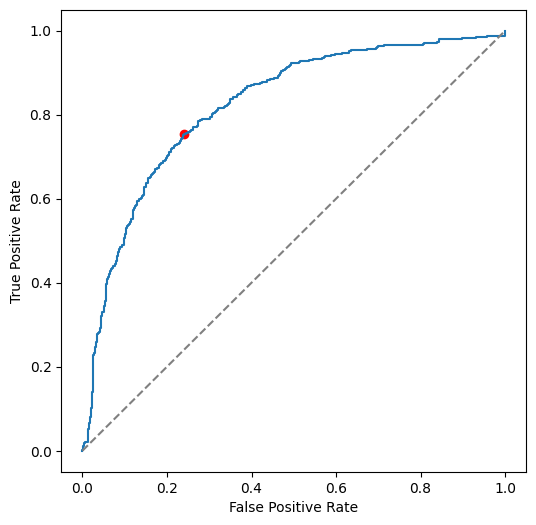

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot

# Step 1: Compute FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(df['label'], df['cdf'])

# Step 2: Calculate the Euclidean distance from each point on the ROC curve to the top-left corner (0, 1)
# The distance formula is: sqrt((FPR - 0)^2 + (TPR - 1)^2)
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)

# Step 3: Find the index of the minimum distance (i.e., the best threshold)
best_threshold_index = np.argmin(distances)
best_threshold = thresholds[best_threshold_index]

# Step 4: Print the best threshold
print(f"Best Threshold: {best_threshold}")

# Optionally, plot the ROC curve and mark the best threshold
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', marker='o', label=f'Best Threshold = {best_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

some test code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

# Example DataFrame (replace with your actual data)
df = merged_df

# Preprocess text (convert to lowercase)
df['text'] = df['text'].fillna('')  # Replace NaN values with empty strings
df['text'] = df['text'].apply(lambda x: str(x).lower())  # Convert to lowercase

# Step 1: Tokenize and count word frequencies in the corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Get word frequencies in the entire corpus
word_freq = np.array(X.sum(axis=0)).flatten()
#word_ranks = np.argsort(word_freq)[::-1]  # Sort words based on frequency (descending order)
word_rank_dict = {word: rank for rank, word in enumerate(vectorizer.get_feature_names_out())}

# Step 2: Calculate the Cumulative Probability Mass (CDF) for each text
def calculate_cdf(text, s=1.5):
    words = text.split()
    ranks = [word_rank_dict[word] for word in words if word in word_rank_dict]
    ranks = np.array(ranks) + 1  # Convert ranks to 1-based (e.g., most common word is rank 1)

    # Calculate the cumulative probability mass
    cdf = np.sum(1 / (ranks ** s)) / np.sum(1 / (np.arange(1, len(word_freq) + 1) ** s))

    return cdf

# Apply CDF calculation to each text
df['cdf'] = df['text'].apply(calculate_cdf)


In [ ]:
# Example: Assuming the 'label' column represents the ground truth (1 for rare-word-heavy, 0 for common-word-heavy)
X_cdf = df['cdf'].values  # CDF values as feature
y = df['label'].values  # Actual labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cdf, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import roc_auc_score

# Since we are using CDF values directly, we can treat them as probabilities
# Predict probabilities (for the sake of this example, we're using the raw CDF values as predicted scores)
y_pred = X_cdf  # Using CDF as predicted values

# Compute AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y, y_pred)
print(f"AUC Score: {auc_score}")


AUC Score: 0.8162885822421778
